In [1]:
import numpy as np, statsmodels.stats.api as sms
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import random
from sklearn import preprocessing

## Type II Error & Power Analysis

**Type II error:** you fail to reject that the program (new feature) had no effect, when in fact it does have an effect

**Power** of a test is the probability that I will be able to find a significant effect in my experiment (given the effect size) (higher power is better since I am more likely to have an effect to report, if there is one.)

In [37]:
# population characteristics 
mean=5
lift = 1.05
std=5
control_m=5
test_m=control_m*lift
mean_d = test_m-control_m
print(mean_d)

0.04999999999999982


In [38]:
ci=[]
#Sample Size = k
k = 5000
for i in range(20):
    ctrl = np.random.normal(5,std,k) 
    test = np.random.normal(5*lift,std,k)
    cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
    x,y = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')
    ci.append((x,y))

In [39]:
# show CI
data_dict = {}
data_dict['Number'] = [x for x in range(20)]
data_dict['lower'] = [x[0] for x in ci]
data_dict['upper'] = [x[1] for x in ci]
dataset = pd.DataFrame(data_dict)  
print(dataset)

    Number     lower     upper
0        0 -0.286506  0.105335
1        1 -0.103060  0.286510
2        2 -0.252060  0.140100
3        3 -0.254617  0.135477
4        4 -0.137973  0.251378
5        5 -0.209147  0.181451
6        6 -0.124398  0.266207
7        7 -0.100601  0.294328
8        8 -0.299166  0.092022
9        9 -0.092726  0.295471
10      10 -0.127501  0.267060
11      11 -0.083887  0.311578
12      12 -0.037330  0.354725
13      13 -0.090755  0.305088
14      14 -0.202796  0.186090
15      15 -0.386575  0.006042
16      16 -0.195367  0.199727
17      17 -0.206941  0.182682
18      18 -0.119051  0.267100
19      19 -0.093845  0.295387


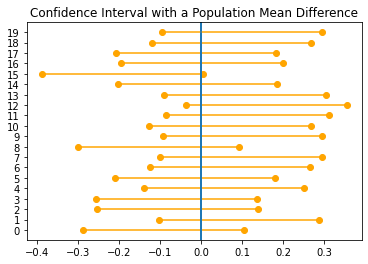

In [40]:
#count the number of wrongly accepting the null, i.e., 0 is in ci.
#bins = np.linspace(0, 18, 10)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['Number']))
    plt.axvline(x=0)
plt.title('Confidence Interval with a Population Mean Difference')
plt.savefig("CIMeanSmall.png")

In [41]:
# Type II and Power
typetwo=sum((x[0]<=0 and x[1]>=0) for x in ci)/20
power=1-typetwo

In [42]:
# # wrong directions
# typesign=sum((x[1]<=0) for x in ci)/20
# power_s=1-typesign

In [43]:
print(typetwo,power)

1.0 0.0


## Find Sample Size 

In [61]:
# population characteristics 
lift = 1.1
std=4
control_m=5
test_m=control_m*lift
mean_d = test_m-control_m
print(mean_d)

0.5


In [62]:
power=[]
n=100
m=500
# the outer loop tries different sample sizes
for s in range(m):
    k =100+10*(s+1)
    ci=[]
    # the inner draw different samples and estimate the power with certain sample size
    for i in range(n):
        ctrl = np.random.normal(5,std,k) 
        test = np.random.normal(5*lift,std,k)
        cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
        a,b = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')
        ci.append((a,b))
    t2=sum((x[0]<=0 and x[1]>=0) for x in ci)/n
    pw=1-t2
    power.append((k,pw))

In [63]:
l_y=[x[1] for x in power]
s_x=[x[0] for x in power]

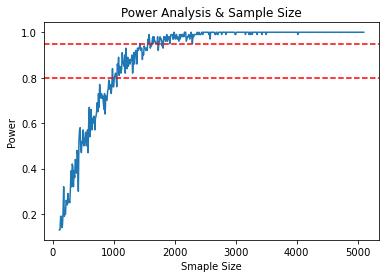

In [64]:
plt.plot(s_x,l_y)
plt.title('Power Analysis' + ' & Sample Size')
plt.xlabel('Smaple Size')
plt.ylabel('Power')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')

In [65]:
plt.savefig("Power_SampleSize.png")

<Figure size 432x288 with 0 Axes>

In [66]:
#power = 0.8
index_80=[power.index(x) for x in power if x[1] >= 0.799999999 and x[1] <= 0.800001]
size_exp_80=[power[i][0] for i in index_80]
size_80=np.average(size_exp_80)
print(size_exp_80,size_80)

[1010] 1010.0


In [67]:
#power = 0.95
index_95=[power.index(x) for x in power if x[1] >= 0.949999999 and x[1] <= 0.9500001]
size_exp_95=[power[i][0] for i in index_95]
size_95=np.average(size_exp_95)
print(size_exp_95,size_95)

[1430, 1570, 1650, 1690, 1700, 1710, 1740, 1920, 2290] 1744.4444444444443


**For power=0.8, sample size for each variant is approximately as:** 16*sample_variance/(mean_difference^2)

In [52]:
N_estimate=(16*(std**2))/(((lift-1)*5)**2)

In [53]:
print(N_estimate)

1599.9999999999973


**For Class Exercise:** You made a change to the checkout process, and you cared about at least 5% change to the purchase rate. You only analyze triggered users who started the checkout process. Assume that 10% of users initiate checkout, and equal size for Treatment and Control. What sample size will you choose for your experiment for 80% statistical power?

In [64]:
#Follow Bernoulli distribution:np.random.binomial(1,p,k) 
lift = 1.05
#m0
p_ctrl = 0.5
#m1
p_test = p_ctrl * lift
delta=(lift-1)*p_ctrl

In [65]:
power=[]
n=200
m=100
for s in range(m):
    k =100+100*(s+1)
    ci=[]
    for i in range(n):
        ctrl = np.random.binomial(1, p_ctrl, k) 
        test = np.random.binomial(1, p_test, k)
        cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
        a,b = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')
        ci.append((a,b))
    t2=sum((x[0]<=0 and x[1]>=0) for x in ci)/n
    pw=1-t2
    power.append((k,pw))

[5900]


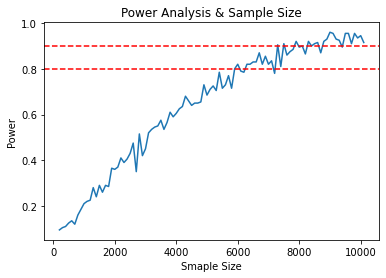

In [66]:
# Visualize the relationship between sample size for the treatment (k) and power
l_y=[x[1] for x in power]
s_x=[x[0] for x in power]
plt.plot(s_x,l_y)
plt.title('Power Analysis' + ' & Sample Size')
plt.xlabel('Smaple Size')
plt.ylabel('Power')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--')
# Find the sample size of power = 0.8
index_=[power.index(x) for x in power if x[1]== 0.8]
size_exp=[power[i][0] for i in index_]
print(size_exp)

In [67]:
# Find the sample size of power = 0.8
index_=[power.index(x) for x in power if x[1] > 0.79 and x[1] < 0.81]
size_exp=[power[i][0] for i in index_]
print(size_exp)

[5900]


**Use fomular to precisely calculate the power and sample size**

In [70]:
from statsmodels.stats.power import zt_ind_solve_power

In [91]:
size_80=zt_ind_solve_power(effect_size=(mean*(lift-1)/std), alpha=0.05, power=0.8, ratio=1,alternative="two-sided")
size_95=zt_ind_solve_power(effect_size=(mean*(lift-1)/std), alpha=0.05, power=0.95, ratio=1,alternative="two-sided")

In [92]:
print(size_80,size_95)

1569.772101902326 2598.9418189023354
